In [33]:
import pandas as pd 
import numpy as np
print("reading..")
df = pd.read_excel('data.xlsm')
print(df)
sdf = pd.DataFrame(df)
sdf = sdf.drop(['type','time','month','day','start time'], axis = 1);
mean = sdf['CO2'].mean()
sdf.fillna(mean,inplace = True)
print(sdf)

reading..
       type  time     H2S   NH3     CO2  label  month  day  start time
0   chicken   0.0    6.07  0.04  1988.0      0      9    1         NaN
1   chicken   1.0    4.75  0.05  1990.0      0      9    1         NaN
2   chicken   3.5    4.50  0.02  1988.0      1      9    1         NaN
3   chicken   6.5    4.89  0.02  1988.0      1      9    1         NaN
4   chicken   8.5    6.57  0.03  1986.0      2      9    1         NaN
..      ...   ...     ...   ...     ...    ...    ...  ...         ...
69  chicken   8.0  153.04  0.16   158.0      2     10    5         NaN
70  chicken   0.0   77.65  0.06   158.0      0     10    6         NaN
71  chicken   1.0   89.21  0.09   158.0      0     10    6         NaN
72  chicken   2.0   94.63  0.10   158.0      0     10    6         NaN
73  chicken   3.0  112.75  0.11   158.0      1     10    6         NaN

[74 rows x 9 columns]
       H2S   NH3     CO2  label
0     6.07  0.04  1988.0      0
1     4.75  0.05  1990.0      0
2     4.50  0.02  1

In [37]:
print("splitting")
x = sdf.drop(['label'], axis = 1);
y = sdf['label']
print(x)
print(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

splitting
       H2S   NH3     CO2
0     6.07  0.04  1988.0
1     4.75  0.05  1990.0
2     4.50  0.02  1988.0
3     4.89  0.02  1988.0
4     6.57  0.03  1986.0
..     ...   ...     ...
69  153.04  0.16   158.0
70   77.65  0.06   158.0
71   89.21  0.09   158.0
72   94.63  0.10   158.0
73  112.75  0.11   158.0

[74 rows x 3 columns]
0     0
1     0
2     1
3     1
4     2
     ..
69    2
70    0
71    0
72    0
73    1
Name: label, Length: 74, dtype: int64


In [38]:
from sklearn import svm
print("SVM:")
print("rbf-")
clf = svm.SVC(kernel='rbf')
clf.fit(x_train,y_train)
svm_predict = clf.predict(x_test)
print(list(svm_predict))
print(list(y_test))
print(clf.score(x_test,y_test))

print("linear-")
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
svm_predict = clf.predict(x_test)
print(list(svm_predict))
print(list(y_test))
print(clf.score(x_test,y_test))

print("poly-")
clf = svm.SVC(kernel='poly')
clf.fit(x_train,y_train)
svm_predict = clf.predict(x_test)
print(list(svm_predict))
print(list(y_test))
print(clf.score(x_test,y_test))

print("sigmoid-")
clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train,y_train)
svm_predict = clf.predict(x_test)
print(list(svm_predict))
print(list(y_test))
print(clf.score(x_test,y_test))

print("alltwo")
number = 0
for item in y_test:
    if item == 2:
        number+=1

print(number/len(y_test))

SVM:
rbf-
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2]
0.30434782608695654
linear-
[1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
[2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2]
0.5652173913043478
poly-
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2]
0.2608695652173913
sigmoid-
[0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2]
0.30434782608695654
alltwo
0.30434782608695654


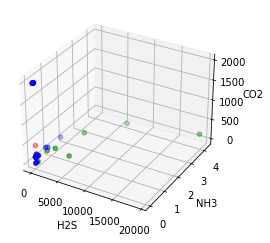

25
27
22


In [39]:
import matplotlib.pyplot as plt

H2S_zero = []
NH3_zero = []
CO2_zero = []
H2S_one = []
NH3_one = []
CO2_one = []
H2S_two = []
NH3_two = []
CO2_two = []
for i in range(len(sdf)):
    if sdf['label'][i] == 0:
        H2S_zero.append(sdf['H2S'][i])
        NH3_zero.append(sdf['NH3'][i])
        CO2_zero.append(sdf['CO2'][i])
    elif sdf['label'][i] == 1:
        H2S_one.append(sdf['H2S'][i])
        NH3_one.append(sdf['NH3'][i])
        CO2_one.append(sdf['CO2'][i])
    else:
        H2S_two.append(sdf['H2S'][i])
        NH3_two.append(sdf['NH3'][i])
        CO2_two.append(sdf['CO2'][i])

H2S_zero = np.array(H2S_zero)
NH3_zero = np.array(NH3_zero)
CO2_zero = np.array(CO2_zero)
H2S_one = np.array(H2S_one)
NH3_one = np.array(NH3_one)
CO2_one = np.array(CO2_one)
H2S_two = np.array(H2S_two)
NH3_two = np.array(NH3_two)
CO2_two = np.array(CO2_two)

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('H2S')
ax.set_ylabel('NH3')
ax.set_zlabel('CO2')
ax.scatter(H2S_zero,NH3_zero,CO2_zero,c='Blue')
ax.scatter(H2S_one,NH3_one,CO2_one,c='Red')
ax.scatter(H2S_two,NH3_two,CO2_two,c='Green')
plt.show()
print(len(H2S_zero))
print(len(H2S_one))
print(len(H2S_two))

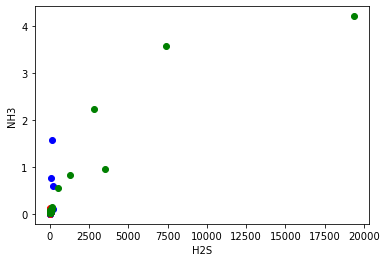

In [40]:
fig = plt.figure()  
ax = fig.add_subplot(111)
ax.set_xlabel('H2S')
ax.set_ylabel('NH3')
ax.scatter(H2S_zero,NH3_zero,c='Blue')
ax.scatter(H2S_one,NH3_one,c='Red')
ax.scatter(H2S_two,NH3_two,c='Green')
plt.show()

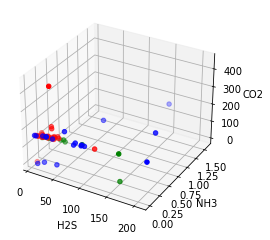

In [41]:
H2S_zero = []
NH3_zero = []
CO2_zero = []
H2S_one = []
NH3_one = []
CO2_one = []
H2S_two = []
NH3_two = []
CO2_two = []
for i in range(len(sdf)):
    if sdf['CO2'][i] < 1000 and sdf['H2S'][i] < 400:
        if sdf['label'][i] == 0:
            H2S_zero.append(sdf['H2S'][i])
            NH3_zero.append(sdf['NH3'][i])
            CO2_zero.append(sdf['CO2'][i])
        elif sdf['label'][i] == 1:
            H2S_one.append(sdf['H2S'][i])
            NH3_one.append(sdf['NH3'][i])
            CO2_one.append(sdf['CO2'][i])
        else:
            H2S_two.append(sdf['H2S'][i])
            NH3_two.append(sdf['NH3'][i])
            CO2_two.append(sdf['CO2'][i])

H2S_zero = np.array(H2S_zero)
NH3_zero = np.array(NH3_zero)
CO2_zero = np.array(CO2_zero)
H2S_one = np.array(H2S_one)
NH3_one = np.array(NH3_one)
CO2_one = np.array(CO2_one)
H2S_two = np.array(H2S_two)
NH3_two = np.array(NH3_two)
CO2_two = np.array(CO2_two)

fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('H2S')
ax.set_ylabel('NH3')
ax.set_zlabel('CO2')
ax.scatter(H2S_zero,NH3_zero,CO2_zero,c='Blue')
ax.scatter(H2S_one,NH3_one,CO2_one,c='Red')
ax.scatter(H2S_two,NH3_two,CO2_two,c='Green')
plt.show()

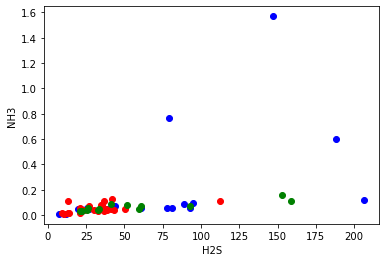

In [42]:
fig = plt.figure()  
ax = fig.add_subplot(111)
ax.set_xlabel('H2S')
ax.set_ylabel('NH3')
ax.scatter(H2S_zero,NH3_zero,c='Blue')
ax.scatter(H2S_one,NH3_one,c='Red')
ax.scatter(H2S_two,NH3_two,c='Green')
plt.show()

In [15]:
df = pd.read_excel('data.xlsm')
print(df)

       type  time     H2S   NH3     CO2  label  month  day  start time
0   chicken   0.0    6.07  0.04  1988.0      0      9    1         NaN
1   chicken   1.0    4.75  0.05  1990.0      0      9    1         NaN
2   chicken   3.5    4.50  0.02  1988.0      1      9    1         NaN
3   chicken   6.5    4.89  0.02  1988.0      1      9    1         NaN
4   chicken   8.5    6.57  0.03  1986.0      2      9    1         NaN
..      ...   ...     ...   ...     ...    ...    ...  ...         ...
69  chicken   8.0  153.04  0.16   158.0      2     10    5         NaN
70  chicken   0.0   77.65  0.06   158.0      0     10    6         NaN
71  chicken   1.0   89.21  0.09   158.0      0     10    6         NaN
72  chicken   2.0   94.63  0.10   158.0      0     10    6         NaN
73  chicken   3.0  112.75  0.11   158.0      1     10    6         NaN

[74 rows x 9 columns]


In [17]:
sdf = pd.DataFrame(df)
sdf = sdf.drop(['type','time','month','day','start time'], axis = 1);
mean = sdf['CO2'].mean()
sdf.fillna(mean,inplace = True)

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
X = sdf.drop(['label'], axis = 1);
y = sdf['label']
print(X)
print(list(y))
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 0)
abc = AdaBoostClassifier(n_estimators = 100, learning_rate = 1)
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("y_test:",list(y_test))
print("y_pred:",list(y_pred))

       H2S   NH3     CO2
0     6.07  0.04  1988.0
1     4.75  0.05  1990.0
2     4.50  0.02  1988.0
3     4.89  0.02  1988.0
4     6.57  0.03  1986.0
..     ...   ...     ...
69  153.04  0.16   158.0
70   77.65  0.06   158.0
71   89.21  0.09   158.0
72   94.63  0.10   158.0
73  112.75  0.11   158.0

[74 rows x 3 columns]
[0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1]
Accuracy: 0.43478260869565216
y_test: [2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2]
y_pred: [1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0]


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
df = pd.read_excel('data.xlsm')
sdf = pd.DataFrame(df)
sdf = sdf.drop(['type','time','month','day','start time'], axis = 1);
mean = sdf['CO2'].mean()
sdf.fillna(mean,inplace = True)
X = sdf.drop(['label'], axis = 1);
y = sdf['label']

print("KNN")

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = i)
    print("seed:",i)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X, y)
    y_pred = neigh.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("y_test:",list(y_test))
    print("y_pred:",list(y_pred))


KNN
seed: 0
Accuracy: 0.7391304347826086
y_test: [2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2]
y_pred: [0, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0]
seed: 1
Accuracy: 0.6956521739130435
y_test: [1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1]
y_pred: [0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 1]
seed: 2
Accuracy: 0.6521739130434783
y_test: [1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1]
y_pred: [1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 0, 1]
seed: 3
Accuracy: 0.6086956521739131
y_test: [0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1]
y_pred: [0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2]
seed: 4
Accuracy: 0.6521739130434783
y_test: [2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1]
y_pred: [2, 0, 2, 1, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1]
seed: 5
Accuracy: 0.65217391304

In [68]:
from sklearn import tree
from sklearn import metrics
df = pd.read_excel('data.xlsm')
sdf = pd.DataFrame(df)
sdf = sdf.drop(['type','time','month','day','start time'], axis = 1);
mean = sdf['CO2'].mean()
sdf.fillna(mean,inplace = True)
X = sdf.drop(['label'], axis = 1);
y = sdf['label']

print("DecisionTreeClassifier")

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = i)
    print("seed:",i)
    clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=2)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("y_test:",list(y_test))
    print("y_pred:",list(y_pred))


DecisionTreeClassifier
seed: 0
Accuracy: 0.5652173913043478
y_test: [2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2]
y_pred: [1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
seed: 1
Accuracy: 0.6956521739130435
y_test: [1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1]
y_pred: [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
seed: 2
Accuracy: 0.6956521739130435
y_test: [1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1]
y_pred: [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1]
seed: 3
Accuracy: 0.5217391304347826
y_test: [0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1]
y_pred: [1, 1, 1, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1]
seed: 4
Accuracy: 0.5652173913043478
y_test: [2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1]
y_pred: [2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1]
seed: 5
Accu

In [65]:
from sklearn import tree
from sklearn import metrics
df = pd.read_excel('data.xlsm')
sdf = pd.DataFrame(df)
sdf = sdf.drop(['type','time','month','day','start time'], axis = 1);
mean = sdf['CO2'].mean()
sdf.fillna(mean,inplace = True)
X = sdf.drop(['label'], axis = 1);
y = sdf['label']

print("DecisionTreeClassifier")

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = i)
    print("seed:",i)
    clf = tree.DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=2)
    clf.fit(X, y)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("y_test:",list(y_test))
    print("y_pred:",list(y_pred))


DecisionTreeClassifier
seed: 0
Accuracy: 0.5652173913043478
y_test: [2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 2, 2]
y_pred: [1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
seed: 1
Accuracy: 0.6521739130434783
y_test: [1, 0, 1, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1]
y_pred: [1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1]
seed: 2
Accuracy: 0.6521739130434783
y_test: [1, 2, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1]
y_pred: [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1]
seed: 3
Accuracy: 0.6086956521739131
y_test: [0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2, 1]
y_pred: [1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1]
seed: 4
Accuracy: 0.6086956521739131
y_test: [2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1]
y_pred: [2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1]
seed: 5
Accu

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
df = pd.read_csv('all.csv')
sdf = pd.DataFrame(df)
sdf = sdf.drop(['type','time','month','day'], axis = 1);
mean = sdf['CO2'].mean()
sdf.fillna(mean,inplace = True)
X = sdf.drop(['label'], axis = 1);
y = sdf['label']

print("KNN")

for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = i)
    print("seed:",i)
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X, y)
    y_pred = neigh.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("y_test:",list(y_test))
    print("y_pred:",list(y_pred))


KNN
seed: 0
Accuracy: 0.6086956521739131
y_test: [2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2]
y_pred: [2, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 2]
seed: 1
Accuracy: 0.6521739130434783
y_test: [1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1]
y_pred: [1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 2]
seed: 2
Accuracy: 0.7391304347826086
y_test: [2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0]
y_pred: [2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2]
seed: 3
Accuracy: 0.8695652173913043
y_test: [2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 0, 1, 2]
y_pred: [2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2]
seed: 4
Accuracy: 0.6956521739130435
y_test: [2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 1]
y_pred: [2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 1]
seed: 5
Accuracy: 0.65217391304